# ❀ Trabalho de Conclusão de Curso ❀

**Tema:** Relevância Temática dos Comentários e Diversidade de Gênero em Projetos Open Source

**Autoras:** Estela Miranda Batista e Gláucia Braga e Silva

**Descrição:** Considerando a natureza colaborativa do desenvolvimento de software, as equipes podem ser formadas por pessoas de diversas culturas, idades, nacionalidades e gêneros, de forma que as equipes que possuem maior diversidade social podem aproveitar de informações mais amplas, experiências e ideias mais variadas e habilidades aprimoradas de resolução de problemas, tornando-se, portanto, mais eficazes. Porém, apesar de sabermos que a diversidade é benefíco durante o desenvolvimento de software, temos que a presença feminina é baixa, tanto em contribuições, quanto em número de membros. Visto isso, o trabalho aqui busca realizar um estudo que aponte questões sobre a participação feminina em tópicos de discussão, como as issues do GitHub e o fóruns de discussão do StackOverflow.

Para realizar tal estudo será utilizado da métrica de similaridade de cossenos, onde é atribuida uma nota de 0 a 4 para os comentários postados nos tópicos de discussão, e também o tempo em que aquele determinado comentário levou para ser respondido. Além disso, iremos verificar o índice de diversidade de cada projeto analisado, e a reputação dos usuários envolvidos. Com essas métricas será possível responder as perguntas de pesquisa definidas, sendo elas:

**1.** Existe diferença entre a relevância dos comentários postados por homens e mulheres?

**2.** Existe relação entre a relevância dos comentários e a reputação do autor?

**3.** Existe relação entre a relevância dos comentários e o tempo de participação na plataforma?

**4.** Existe diferença do tempo de resposta ao comentário mais relevante em uma issue segundo o gênero do autor?

**5**. Qual a diferença entre número de comentários postados por homens e mulheres?

In [1]:
# Importando as Bibliotecas Necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando o Arquivo Usado
dados = pd.read_csv('dadosGitHubComentarios.csv', index_col=None, header=0)
dadosIssues = pd.read_csv('dadosGitHubIssues.csv', index_col=None, header=0)

In [2]:
dados

,NumeroIssue,TituloIssue,DescricaoIssue,CriacaoIssue,NumeroComentario,Comentario,DataComentario,RelevanciaTematica,Reputacao,AnosPlataforma,Genero
0,2126,Update dependency @types/node to v16,[![WhiteSource Renovate](https://app.renovateb...,2021-10-26T13:26:17Z,951954780,# [Codecov](https://codecov.io/gh/mozilla/addo...,2021-10-26T13:43:54Z,0.088300,0,6,None
1,2126,Update dependency @types/node to v16,[![WhiteSource Renovate](https://app.renovateb...,2021-10-26T13:26:17Z,951965911,"@willdurand I believe we are on node v14, so s...",2021-10-26T13:55:51Z,0.014058,75,13,male
2,2126,Update dependency @types/node to v16,[![WhiteSource Renovate](https://app.renovateb...,2021-10-26T13:26:17Z,984926548,"> @willdurand I believe we are on node v14, so...",2021-12-02T19:16:52Z,0.029444,1676,12,male
3,2126,Update dependency @types/node to v16,[![WhiteSource Renovate](https://app.renovateb...,2021-10-26T13:26:17Z,984944808,">> @willdurand I believe we are on node v14, s...",2021-12-02T19:42:19Z,0.061814,75,13,male
4,1897,"[Review Tools] No Need to Process ""Known JS li...","Currently, the review tools processes and synt...",2021-03-19T12:06:10Z,802829620,"Should this be an addons-code-manager issue, o...",2021-03-19T13:23:39Z,0.038175,75,13,male
...,...,...,...,...,...,...,...,...,...,...,...
9146,330,Remove chat fragments and pagerview from Event...,EventChatFragment\nTopicChatFragment\n,2015-12-30T02:45:10Z,172167498,@shehbashahab lightning fast :zap: :facepunch: \n,2016-01-16T07:04:16Z,0.000185,136,10,male
9147,279,"posts: when a user adds a new post, scroll to ...",- this requires passing the post back to the p...,2015-11-13T22:50:19Z,169553103,@RoyPuja noticing you are assigned. Are you ac...,2016-01-07T05:12:20Z,0.016483,136,10,male
9148,279,"posts: when a user adds a new post, scroll to ...",- this requires passing the post back to the p...,2015-11-13T22:50:19Z,169566773,"Yes,I am.\n",2016-01-07T06:27:17Z,0.000182,4,7,male
9149,279,"posts: when a user adds a new post, scroll to ...",- this requires passing the post back to the p...,2015-11-13T22:50:19Z,170394129,"This works for text posts.@zassmin,@shehbashah...",2016-01-10T21:09:59Z,0.024899,4,7,male


Com os Dados então inseridos, contando com todos os campos necessários para as análises, temos que iremos gerar gráficos, tabelas, entre outros para verificar as respostas para as perguntas apresentadas acima.

#### 🟣 **1.** Existe diferença entre a relevância dos comentários postados por homens e mulheres?

Para poder verificar a diferença entre a relevância dos comentários postados por homens e mulheres, basta fazer uma média aritmética com a filtragem dos mesmos. Neste caso, temos então as médias:

**Homens:** 0.04

**Mulheres:** 0.03

Além disso, foi feito um gráfico, para verificar esse intervalo, e se eles continham muitos outlier. E nesse caso, foi possível notar que os homens continham mais outlier que as mulheres, possuindo como nota máxima na escala de 0 a 1 a nota 0.7, enquanto as mulheres tem como nota máxima cerca de 0.5. Considerando que a escala tem um intervalo relativamente pequeno é possível notar que temos uma diferença consideravél entre a relevância de comentários postados por homens e mulheres.

In [3]:
mediaHomens = float(dados[dados['Genero'] == 'male'][['RelevanciaTematica']].mean())
mediaMulheres = float(dados[dados['Genero'] == 'female'][['RelevanciaTematica']].mean())

print('Homens: {0: .5f}'.format(mediaHomens))
print('Mulheres: {0: .5f}'.format(mediaMulheres))

Homens:  0.03664
Mulheres:  0.03627


[Text(0.5, 0, 'Gênero'), Text(0, 0.5, 'Relevância Temática')]

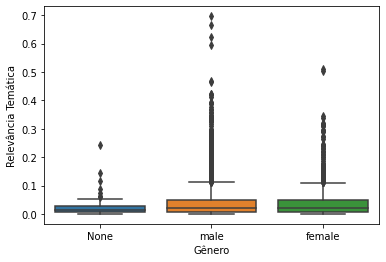

In [4]:
sns.boxplot(data=dados, x='Genero', y='RelevanciaTematica').set(xlabel='Gênero', ylabel='Relevância Temática')

In [5]:
li = [dados[:216], dados[216:462], dados[462:667], dados[667:1034], dados[1034:1804], dados[1885:2088], dados[2113:2282], 
      dados[2539:2892], dados[2892:2932], dados[3171:3395], dados[3620:3707], dados[3707:4092], dados[4110:4620], 
     dados[4620:4975], dados[4975:5188], dados[5943:7715], dados[7715:9047]]
comunidadesAbertas = pd.concat(li, axis=0, ignore_index=True)
li = [dados[1804:1885], dados[2088:2113], dados[2113:2539], dados[2932:3060], dados[3060:3091], dados[3091:3141], dados[3091:3171],
     dados[3395:3517], dados[3517:3620], dados[4092:4110], dados[5188:5943], dados[9047::]]                                       
comunidadesExclusivas = pd.concat(li, axis=0, ignore_index=True)

[Text(0.5, 0, 'Gênero'), Text(0, 0.5, 'Relevância Temática')]

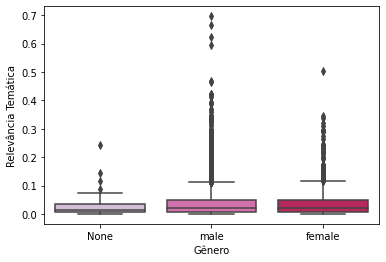

In [6]:
sns.boxplot(data=comunidadesAbertas, x='Genero', y='RelevanciaTematica', palette="PuRd").set(xlabel='Gênero', ylabel='Relevância Temática')

[Text(0.5, 0, 'Gênero'), Text(0, 0.5, 'Relevância Temática')]

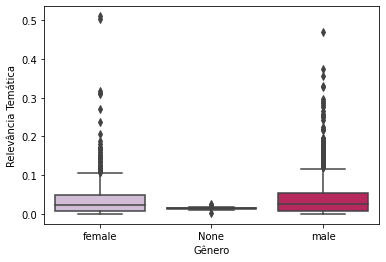

In [7]:
sns.boxplot(data=comunidadesExclusivas, x='Genero', y='RelevanciaTematica', palette="PuRd").set(xlabel='Gênero', ylabel='Relevância Temática')

#### 🔵 **2.** Existe relação entre a relevância dos comentários e a reputação do autor?

[Text(0.5, 0, 'Relevância Temática'), Text(0, 0.5, 'Reputação'), None]

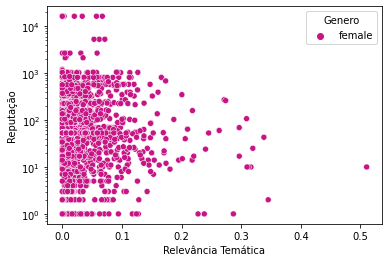

In [8]:
sns.set_palette(['mediumvioletred', 'cornflowerblue', 'lightcoral', 'c'])
dadosMulheres = dados[dados.Genero == 'female']
sns.scatterplot(data=dadosMulheres, x='RelevanciaTematica', y='Reputacao', hue='Genero').set(xlabel='Relevância Temática', ylabel='Reputação', yscale='log')

[Text(0.5, 0, 'Relevância Temática'), Text(0, 0.5, 'Reputação'), None]

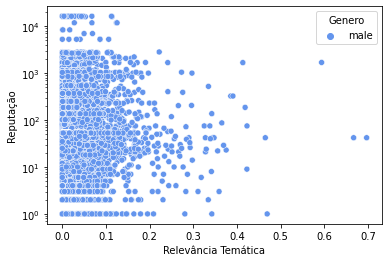

In [9]:
sns.set_palette(['cornflowerblue', 'lightcoral', 'c'])
dadosHomens = dados[dados.Genero == 'male']
sns.scatterplot(data=dadosHomens, x='RelevanciaTematica', y='Reputacao', hue='Genero').set(xlabel='Relevância Temática', ylabel='Reputação', yscale='log')

[Text(0.5, 0, 'Relevância Temática'), Text(0, 0.5, 'Reputação'), None]

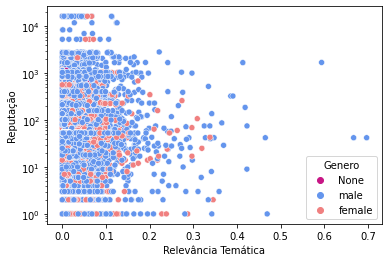

In [10]:
sns.set_palette(['mediumvioletred', 'cornflowerblue', 'lightcoral', 'c'])
sns.scatterplot(data=comunidadesAbertas, x='RelevanciaTematica', y='Reputacao', hue='Genero').set(xlabel='Relevância Temática', ylabel='Reputação', yscale='log')

[Text(0.5, 0, 'Relevância Temática'), Text(0, 0.5, 'Reputação'), None]

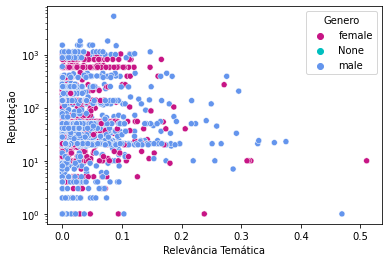

In [11]:
sns.set_palette(['mediumvioletred', 'c', 'cornflowerblue'])
sns.scatterplot(data=comunidadesExclusivas, x='RelevanciaTematica', y='Reputacao', hue='Genero').set(xlabel='Relevância Temática', ylabel='Reputação', yscale='log')

In [12]:
# Correlação entrr a Reputação e a Relevância Temática
dados[['Reputacao', 'RelevanciaTematica']].corr()

,Reputacao,RelevanciaTematica
Reputacao,1.000000,-0.045266
RelevanciaTematica,-0.045266,1.000000


#### ⚪️ **3.** Existe relação entre a relevância dos comentários e o tempo de participação na plataforma?

[Text(0.5, 0, 'Relevância Temática'), Text(0, 0.5, 'Anos na Plataforma')]

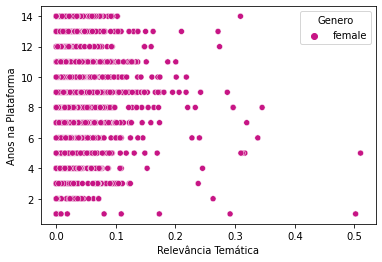

In [13]:
sns.set_palette(['mediumvioletred','c'])
dadosMulheres = dados[dados.Genero == 'female']
sns.scatterplot(data=dadosMulheres, x='RelevanciaTematica', y='AnosPlataforma', hue='Genero').set(xlabel='Relevância Temática', ylabel='Anos na Plataforma')

[Text(0.5, 0, 'Relevância Temática'), Text(0, 0.5, 'Anos na Plataforma')]

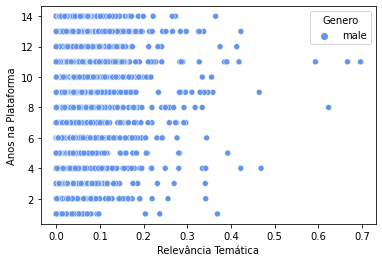

In [14]:
sns.set_palette(['cornflowerblue','c'])
dadosHomens = dados[dados.Genero == 'male']
sns.scatterplot(data=dadosHomens, x='RelevanciaTematica', y='AnosPlataforma', hue='Genero').set(xlabel='Relevância Temática', ylabel='Anos na Plataforma')

[Text(0.5, 0, 'Relevância Temática'), Text(0, 0.5, 'Anos na Plataforma')]

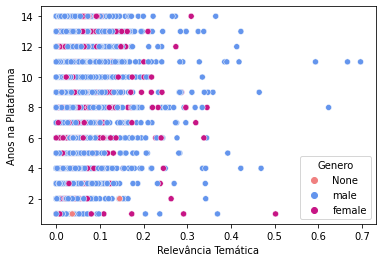

In [15]:
sns.set_palette(['lightcoral', 'cornflowerblue', 'mediumvioletred','c'])
sns.scatterplot(data=comunidadesAbertas, x='RelevanciaTematica', y='AnosPlataforma', hue='Genero').set(xlabel='Relevância Temática', ylabel='Anos na Plataforma')

[Text(0.5, 0, 'Relevância Temática'), Text(0, 0.5, 'Anos na Plataforma')]

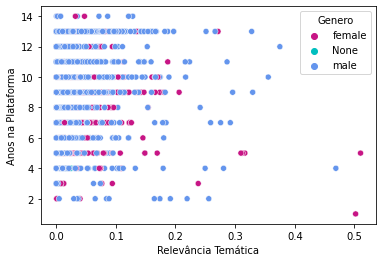

In [16]:
sns.set_palette(['mediumvioletred', 'c', 'cornflowerblue'])
sns.scatterplot(data=comunidadesExclusivas, x='RelevanciaTematica', y='AnosPlataforma', hue='Genero').set(xlabel='Relevância Temática', ylabel='Anos na Plataforma')

In [17]:
# Correlação entre os Anos de Participação e a Relevância Temática
dados[['AnosPlataforma', 'RelevanciaTematica']].corr()

,AnosPlataforma,RelevanciaTematica
AnosPlataforma,1.000000,-0.052067
RelevanciaTematica,-0.052067,1.000000


#### 🟡 **4.** Qual a diferença entre número de tópicos postados por homens e mulheres?

In [18]:
issuesHomens = int(dadosIssues[dadosIssues['Genero'] == 'male'][['NumeroIssue']].count())
issuesMulheres = int(dadosIssues[dadosIssues['Genero'] == 'female'][['NumeroIssue']].count())

print('Número de Issues Feitas por Homens: '+str(issuesHomens))
print('Número de Issues Feitas por Mulheres: '+str(issuesMulheres))

Número de Issues Feitas por Homens: 1067
Número de Issues Feitas por Mulheres: 204


[Text(0.5, 0, 'Gênero'), Text(0, 0.5, 'Issues Reportadas')]

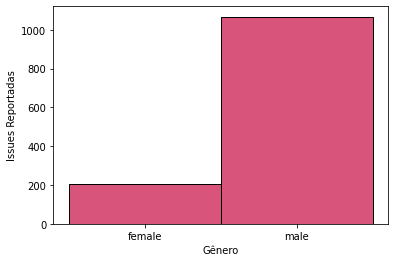

In [19]:
sns.set_palette(sns.color_palette("rocket", 1))
sns.histplot(data=dadosIssues, x='Genero').set(xlabel='Gênero', ylabel='Issues Reportadas')

In [20]:
dadosIssues = dadosIssues[214::]
issuesHomens = int(dadosIssues[dadosIssues['Genero'] == 'male'][['NumeroIssue']].count())
issuesMulheres = int(dadosIssues[dadosIssues['Genero'] == 'female'][['NumeroIssue']].count())

print('Número de Issues Feitas por Homens: '+str(issuesHomens))
print('Número de Issues Feitas por Mulheres: '+str(issuesMulheres))

Número de Issues Feitas por Homens: 955
Número de Issues Feitas por Mulheres: 102


In [21]:
dadosIssues = pd.read_csv('dadosGitHubIssues.csv', index_col=None, header=0)
dadosIssues = dadosIssues[:214]
issuesHomens = int(dadosIssues[dadosIssues['Genero'] == 'male'][['NumeroIssue']].count())
issuesMulheres = int(dadosIssues[dadosIssues['Genero'] == 'female'][['NumeroIssue']].count())

print('Número de Issues Feitas por Homens: '+str(issuesHomens))
print('Número de Issues Feitas por Mulheres: '+str(issuesMulheres))

Número de Issues Feitas por Homens: 112
Número de Issues Feitas por Mulheres: 102


#### 🟠 **5**. Qual a diferença entre número de comentários postados por homens e mulheres?

In [22]:
comentariosHomens = int(dados[dados['Genero'] == 'male'][['RelevanciaTematica']].count())
comentariosMulheres = int(dados[dados['Genero'] == 'female'][['RelevanciaTematica']].count())
comentariosNone = int(dados[dados['Genero'] == 'None'][['RelevanciaTematica']].count())
comentariosBot = int(dados[dados['Genero'] == 'bot'][['RelevanciaTematica']].count())

print('Número de Comentários Feitos por Homens: '+str(comentariosHomens))
print('Número de Comentários Feitos por Mulheres: '+str(comentariosMulheres))
print('Número de Comentários Feitos sem Identificação: '+str(comentariosNone))
print('Número de Comentários Feitos por Bots: '+str(comentariosBot))

Número de Comentários Feitos por Homens: 7131
Número de Comentários Feitos por Mulheres: 1956
Número de Comentários Feitos sem Identificação: 64
Número de Comentários Feitos por Bots: 0


[Text(0.5, 0, 'Gênero'), Text(0, 0.5, 'Comentários Feitos')]

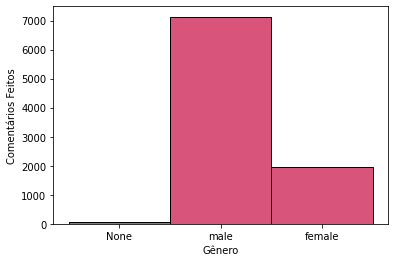

In [23]:
sns.set_palette(sns.color_palette("rocket", 1))
sns.histplot(data=dados, x='Genero').set(xlabel='Gênero', ylabel='Comentários Feitos')

In [24]:
comentariosHomens = int(comunidadesAbertas[comunidadesAbertas['Genero'] == 'male'][['RelevanciaTematica']].count())
comentariosMulheres = int(comunidadesAbertas[comunidadesAbertas['Genero'] == 'female'][['RelevanciaTematica']].count())
comentariosNone = int(comunidadesAbertas[comunidadesAbertas['Genero'] == 'None'][['RelevanciaTematica']].count())
comentariosBot = int(comunidadesAbertas[comunidadesAbertas['Genero'] == 'bot'][['RelevanciaTematica']].count())

print('Número de Comentários Feitos por Homens: '+str(comentariosHomens))
print('Número de Comentários Feitos por Mulheres: '+str(comentariosMulheres))
print('Número de Comentários Feitos sem Identificação: '+str(comentariosNone))
print('Número de Comentários Feitos por Bots: '+str(comentariosBot))

Número de Comentários Feitos por Homens: 6106
Número de Comentários Feitos por Mulheres: 1292
Número de Comentários Feitos sem Identificação: 49
Número de Comentários Feitos por Bots: 0


In [25]:
comentariosHomens = int(comunidadesExclusivas[comunidadesExclusivas['Genero'] == 'male'][['RelevanciaTematica']].count())
comentariosMulheres = int(comunidadesExclusivas[comunidadesExclusivas['Genero'] == 'female'][['RelevanciaTematica']].count())
comentariosNone = int(comunidadesExclusivas[comunidadesExclusivas['Genero'] == 'None'][['RelevanciaTematica']].count())
comentariosBot = int(comunidadesExclusivas[comunidadesExclusivas['Genero'] == 'bot'][['RelevanciaTematica']].count())

print('Número de Comentários Feitos por Homens: '+str(comentariosHomens))
print('Número de Comentários Feitos por Mulheres: '+str(comentariosMulheres))
print('Número de Comentários Feitos sem Identificação: '+str(comentariosNone))
print('Número de Comentários Feitos por Bots: '+str(comentariosBot))

Número de Comentários Feitos por Homens: 1166
Número de Comentários Feitos por Mulheres: 742
Número de Comentários Feitos sem Identificação: 15
Número de Comentários Feitos por Bots: 0
